<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [429]:
pip install sklearn-lvq

In [430]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d
from sklearn.mixture import GaussianMixture
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm
from sklearn_lvq import GlvqModel
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import math

In [431]:
#Para acomodar la información si viene por minuto y en registros, 
#df = pd.read_csv('rg1.csv')
## aqui agrupamos por minuto
#df_grouped_multiple = df.groupby(['YEAR','MONTH','DAY','HOUR']).agg({'RG1': ['mean']})
#df_grouped_multiple.columns = ['rg1_mean']
#df_grouped_multiple = df_grouped_multiple.reset_index()
## aquí pivoteamos
#df1 = df_grouped_multiple.pivot(index=['YEAR','MONTH','DAY'], columns='HOUR', values='rg1_mean').dropna()
#print(df1) #df1.to_csv('res.csv')
#df1.columns = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']]

In [432]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,dot_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('horas', color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('radiación solar', color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    for p in serie_:
        if dot_== True:
           plt.plot(p,alpha=0.4, linestyle='dashed', linewidth=3)
        else:
           plt.plot(p,alpha=0.4)              
    plt.show()

In [433]:
def scatterplot(X_,Y_,tags_,centers_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    for k in centers_:
        x = k[7]; y = k[8]
        plt.plot(x,y,"o",color="red",)
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('hora 7',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('hora 8',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, c=tags_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

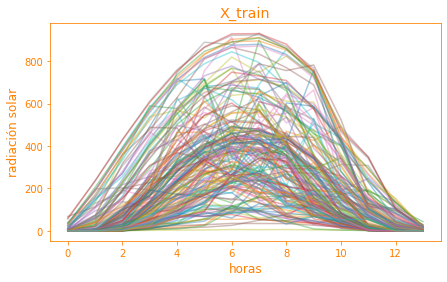

In [446]:
df = pd.read_csv('rg1_horas.csv')
df_invierno = df[(df.MONTH==11)|(df.MONTH==12)|(df.MONTH==1)|(df.MONTH==2)|(df.MONTH==3)|(df.MONTH==4)]
df_verano   = df[(df.MONTH==5) |(df.MONTH==6) |(df.MONTH==7)|(df.MONTH==8)|(df.MONTH==9)|(df.MONTH==10)]
df = df_invierno
horas_verano   = ['4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
horas_invierno = ['5','6','7','8','9','10','11','12','13','14','15','16','17','18']
X = df[horas_invierno].to_numpy()
x_total   = df[['SUMA']].to_numpy()
dx_total  = df[['dSUMA']].to_numpy()
ddx_total = df[['ddSUMA']].to_numpy()

#Normalizing the data
#sc = StandardScaler()
#X  = sc.fit_transform(X)
#y  = sc.fit_transform(Y)

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=.5)#

print_serie(X_train,'X_train',False)
#print_serie(X_test,'X_test')

# **K-means**


[ 5  6  9 13  2 10 10 10 14 10  2  5  6  8 13  5 14 15  0  1 13  5  1  0
  6 15  5  2  9 14  5  8  0  1  5  1  1 15 14 10  2 15  0  4  1 10 10  8
 15  0  2  4  0 14  8  5 13 15  6 15  5  0  1  1  1  2  6  5  8 15  4 10
  5  8  8 13  6  1  5 14  5 14 15  6  1  0  5 15  5  1 10  5  5  1  2 13
  1  5 10  4 15  8  9  6  5  0  8 10  5 13 10 13 13  8  8  4  8  8  4 13
  6  0 13  5 10 13  1  2 13 10 14  2  2  0  6  8  6 13  9  8 10 13  5  8
 15  8 13 13  6 15  1  6 14 10  1 10  1  5  8  1  1 10  5  5  6  0  2  3
  6  0  6  0 14 14  5  6  5  0  8  6]


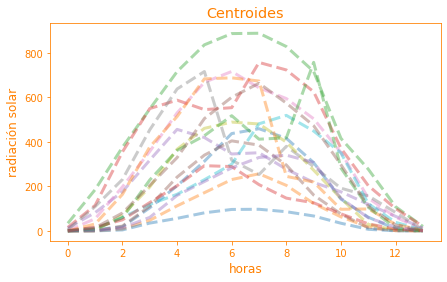

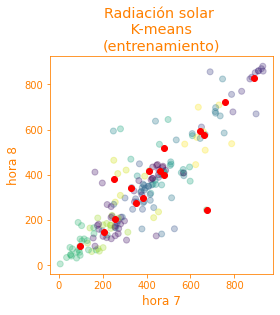

In [453]:
n_clusters = 16
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10) # una variante MiniBatchKMeans  
k_means = k_means.fit(X_train)
values  = k_means.cluster_centers_.squeeze()
labels  = k_means.labels_
centers_= k_means.cluster_centers_
#print('Centroides', centers_)
#print('Exactitud:', k_means.score(X_test))
y_pred = k_means.predict(X_test)
y_pred_train = k_means.predict(X_train)
print(y_pred)
print_serie(centers_,'Centroides',True)
scatterplot(X_train[:,7],X_train[:,8],labels,centers_,'Radiación solar \n K-means \n(entrenamiento)','fig_t13_train')

X_train


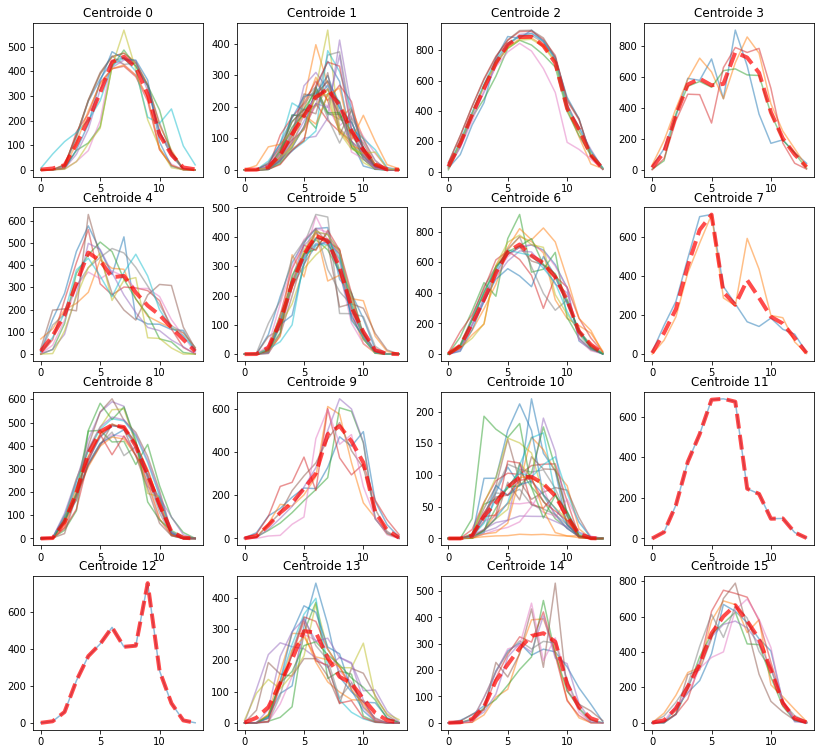

X_test


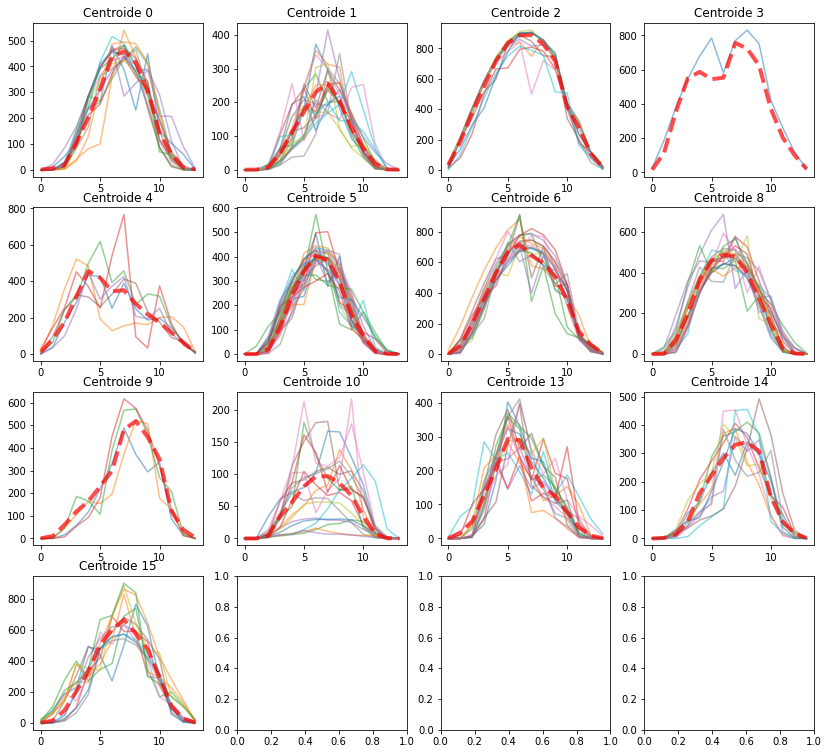

In [470]:
def print_patrones(list_series,list_categorias,list_patrones): 
    cat = np.unique(list_categorias)
    n = math.ceil(pow(n_clusters, 0.5))
    fig, axs = plt.subplots(n, n, figsize=(14,13))
    row=0; col=0
    for c in cat:
        j = 0
        for g in list_categorias:    
            if c == g:
                axs[row,col].plot(list_series[j],alpha=0.5)
                axs[row,col].set_title('Centroide '+str(c))
                #axs[row,col].xaxis.set_xlabel(horas_invierno)
            j = j + 1
        axs[row, col].plot(list_patrones[c],alpha=0.7,color='red',linestyle='dashed',linewidth=4)
        col = col + 1
        if col == n:
            col = 0
            row = row + 1  
    plt.show()

print('X_train')
print_patrones(list_series=X_train,list_categorias=y_pred_train,list_patrones=centers_)
print('X_test')
print_patrones(list_series=X_test,list_categorias=y_pred,list_patrones=centers_)

# **LVQ**

In [458]:
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_rslvq.html
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/index.html
#https://mrnuggelz.github.io/sklearn-lvq/modules/generated/sklearn_lvq.GlvqModel.html#sklearn_lvq.GlvqModel
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_glvq.html#sphx-glr-auto-examples-plot-glvq-py

print('GLVQ:')
glvq = GlvqModel(prototypes_per_class=5, initial_prototypes=None)
glvq.fit(X_train,labels)
glvq_pred = glvq.predict(X_test)
print(glvq_pred)
print('classification accuracy:', glvq.score(X_test, glvq_pred))
plt.show()

GLVQ:
[ 5  6  0 13  2 10 10 10 14 10  2  5  2  8 13  5  5 15 14  1 13  8  5  0
  6 15  5  2  9  0  5  8  9  1  5  1  1  9 14 10  2 15  0  4  1 10 10  5
 15  0  2  4  0 14 15  5 14  6  6 15  5  0  1  1  1  2  6  8  8  0  4 10
  5  8  0  1  6 10  5  9  5  0 15  6  1  0  5 15  5  1 10  5  0  1  2 13
  1  5 10  4 15  8  9  6  5  0  8 10  5  1 10 13 13  8  0  4  8  4  4 13
  6  0 13  5 10 13  1  2 13 10 14  2  2  8  6  0  6 13  9  8 10 13  5  8
 15  8 13 13  6  6  1  6  5  1  1 10  1 14  8  1  1 10 13  5  6  0  2  3
  6  0  6  0 14 14  5  6  5  0  8  6]
classification accuracy: 1.0


[ 0  1  2  3  4  5  6  8  9 10 13 14 15]


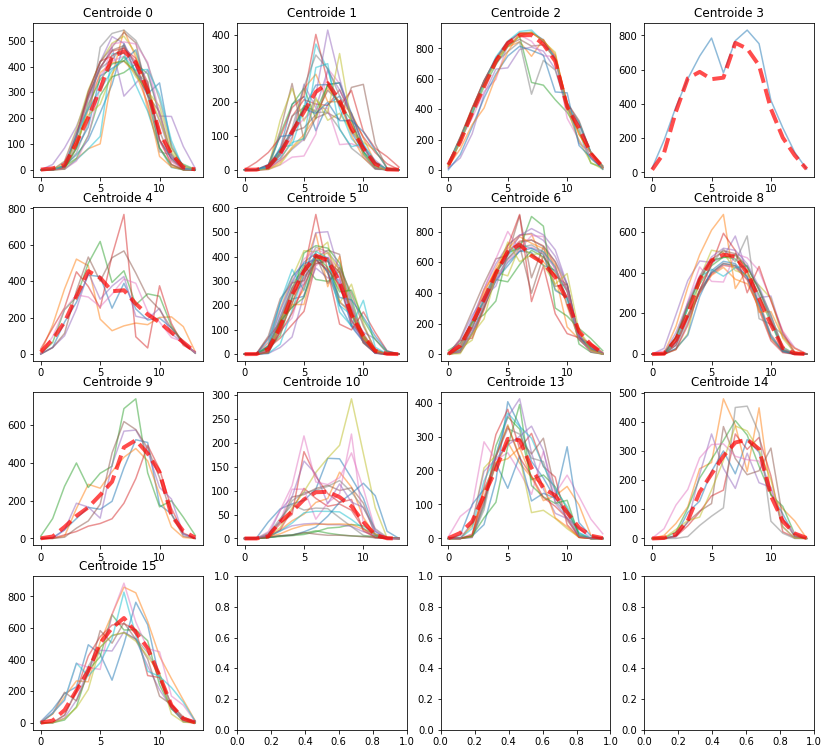

In [459]:
print_patrones(list_series=X_test,list_categorias=glvq_pred,list_patrones=centers_)

# **GaussianMixture**

In [472]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
# fit a Gaussian Mixture Model with two components
gm = GaussianMixture(n_components=n_clusters, init_params='kmeans',covariance_type='diag') #full, tied, diag, spherical
gm.fit(X_train)

print(gm.predict(X_test))
gm_pred = gm.predict(X_test)
print('classification accuracy:', gm.score(X_test, gm_pred))


[ 0  7 11  0  1 11 11  3 11  0  1  0 12  9 11 11 11 12  4  0  0  9  0  0
  7 12  0  1 14 14  0  9 11  0  9  0  8  4 14  3 12  6  9  4 11  0  0  9
  6  4  1  4  9 11  9  0 11  7  7 12 11  9 11  0  0  1  7  9  4 11  4  3
  0  9  9 11 12 11 11 14  9  0 12 12  0 11 11  6  9  0  3  9  0  0 12 11
 11  0 14  4 11  4 14  7  0  0  9  3  9  4  3  0  0  9  9  4  9  4  4  4
  7  9  0  9  0 11  0  1  9  0 11  1 12  9  7  9  7  4 11  6  3  0  0  9
 12  6 11  0  7 12  0 12 11  0  0 11  0  4  9 11 11 11 11  0 12 11  1 13
  7  9  7 11  0  9  0  7  0 11  9  7]
classification accuracy: -56.29981753531418


[ 0  1  3  4  6  7  8  9 11 12 13 14]


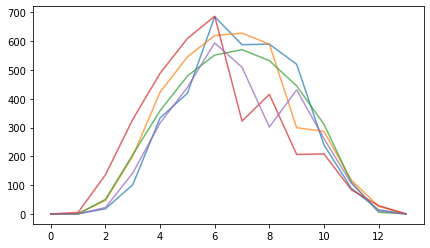

In [473]:
uni = np.unique(gm_pred)
print(uni)
plt.figure(figsize=(7, 4))
j=0
for i in gm_pred:
    if i==6:
      plt.plot(X_test[j],alpha=0.7)
    j = j + 1
plt.show()

# **KNN**

In [ ]:
#https://scikit-learn.org/stable/modules/neighbors.html#classification
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_train)  #['auto','ball_tree','kd_tree','brute'].
distances, indices = nbrs.kneighbors(X_train)
print(distances, indices)
nbrs.kneighbors_graph(X_train).toarray()

In [475]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, labels)
knn_pred = knn.predict(X_test)
print(knn_pred)
#print(knn.predict_proba(X_test))
knn.score(X_test,knn_pred)

[ 5  6  0 13  2 10 10 10 14 10  2  5  2  8 13  5  5  6 14  1 13  8  5  0
  6  6  5  2  9  0  5  8  0  1  5  1  1  9  0 10  2 15  0  4  1 10 10  5
 15  0  2  4  0  1  0  5 14  6  6 15  5  0  1  1  1  2  6  8  4  0  4 10
  5  8  0  1  6  1  5  9  5  0  6  6  1  0  5 15  8  1 10  5  0  1  2 13
  1  5 10  4 15  0  9  6  5  0  8 10  5  1 10 13  1  0  0  4  8  4  4 13
  6  0 13  5 10 13  1  2 13 10  1  2  2  8  6  0  6 13  0  8 10  1  5  8
 15  0  1 13  6  6  1  6  5  1  1 10  1 13  8  1  1 10  5  5  6  0  2  2
  6  0  6  0  1 14  5  6  5  0  8  6]


1.0

[ 0  1  2  4  5  6  8  9 10 13 14 15]


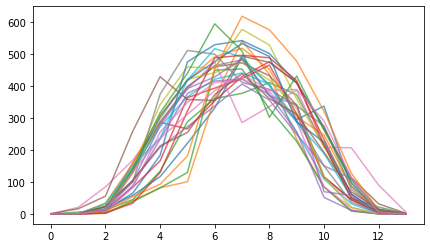

In [476]:
uni = np.unique(knn_pred)
print(uni)
plt.figure(figsize=(7, 4))
j=0
for i in knn_pred:
    if i==0:
      plt.plot(X_test[j],alpha=0.7)
    j = j + 1
plt.show()

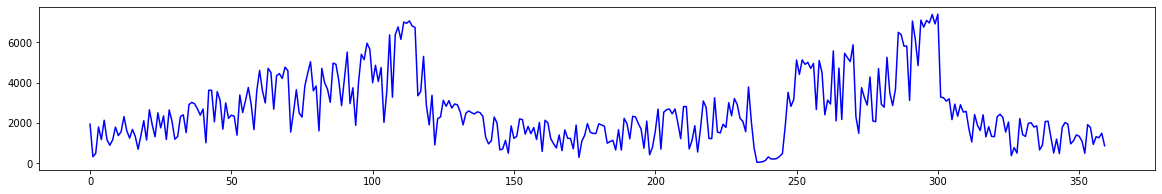

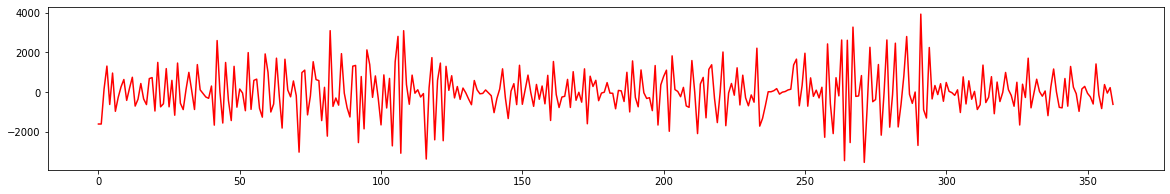

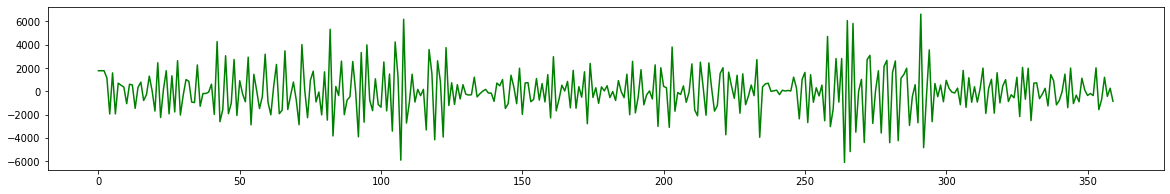

<Figure size 1440x216 with 0 Axes>

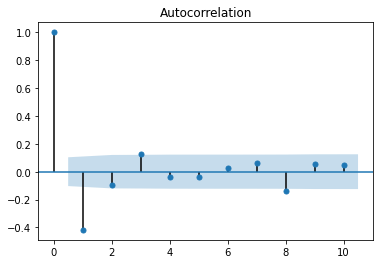

<Figure size 1440x216 with 0 Axes>

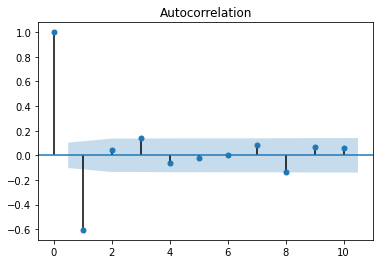

In [477]:
plt.figure(figsize=(20, 3))
plt.plot(x_total,alpha=1,color='blue')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(dx_total,alpha=1,color='red')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(ddx_total,alpha=1,color='green')
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(dx_total, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(ddx_total, lags=10)
plt.show()